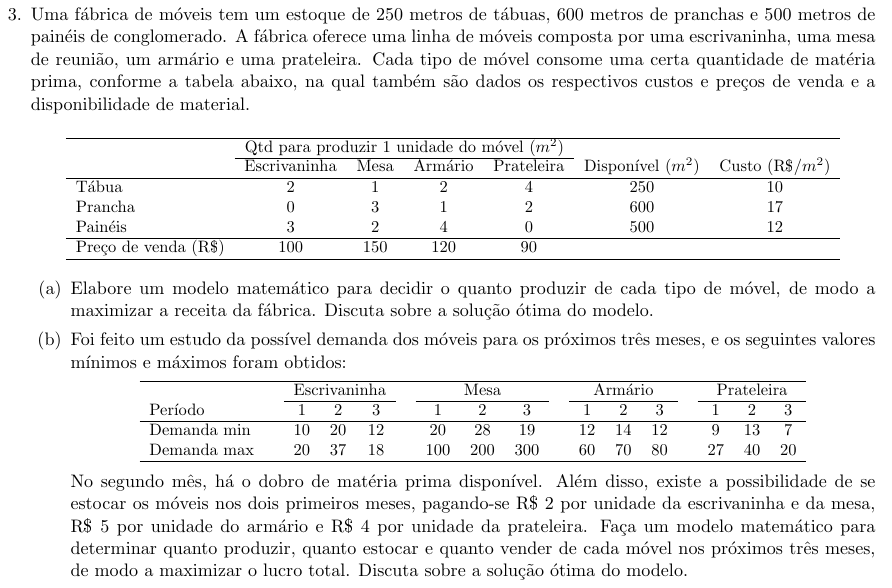

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='images/3.png')

In [7]:
# Módulos
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [8]:
# Dados
Moveis = ['Escrivaninha', 'Mesa', 'Armário', 'Prateleira']
Recursos = ['Tábua', 'Prancha', 'Painéis']
qtd_R_M = {('Tábua', 'Escrivaninha'): 2, ('Tábua', 'Mesa'): 1, ('Tábua', 'Armário'): 2,('Tábua', 'Prateleira'): 4,
           ('Prancha', 'Escrivaninha'): 0, ('Prancha', 'Mesa'): 3, ('Prancha', 'Armário'): 1,('Prancha', 'Prateleira'): 2, 
           ('Painéis', 'Escrivaninha'): 3, ('Painéis', 'Mesa'): 2, ('Painéis', 'Armário'): 4,('Painéis', 'Prateleira'): 0}
preco_M = {'Escrivaninha': 100, 'Mesa': 150, 'Armário': 120, 'Prateleira': 90}
custo_R = {'Tábua': 10, 'Prancha': 17, 'Painéis': 12}
disponibilidade_R = {'Tábua': 250, 'Prancha': 600, 'Painéis': 500}

In [9]:
# Modelo
model = ConcreteModel()

# Conjuntos
model.M = Set(initialize=Moveis)
model.R = Set(initialize=Recursos)
M, R = model.M, model.R

# Parâmetros
model.q = Param(R * M, initialize=qtd_R_M, within=NonNegativeReals)
model.p = Param(M, initialize=preco_M, within=NonNegativeReals)
model.c = Param(R, initialize=custo_R, within=NonNegativeReals)
model.a = Param(R, initialize=disponibilidade_R, within=NonNegativeReals)
q, p, c, a = model.q, model.p, model.c, model.a

# Variáveis de decisão
model.x = Var(M, within=NonNegativeIntegers)
x = model.x

# Função objetivo
model.obj = Objective(sense=maximize,
                      expr = sum(p[i] * x[i] for i in M))

# Restrições
# Disponibilidade
model.r_disp = ConstraintList()
for j in R:
    model.r_disp.add(expr = sum(q[j, i] * x[i] for i in M) <= a[j])

In [10]:
# Resolução
solver = SolverFactory('glpk')
resultado = solver.solve(model, tee=False)

In [11]:
# Apresentação de resultados
if (resultado.solver.status == SolverStatus.ok) and (resultado.solver.termination_condition != TerminationCondition.infeasible):
    for i in M:
        print('Devem ser produzidas {:.0f} unidades de {}.'.format(value(x[i]), i))
    print()
    print('A receita máxima é de R${:.2f}.'.format(value(model.obj)))
else:
    print(resultado.solver.termination_condition)

Devem ser produzidas 25 unidades de Escrivaninha.
Devem ser produzidas 200 unidades de Mesa.
Devem ser produzidas 0 unidades de Armário.
Devem ser produzidas 0 unidades de Prateleira.

A receita máxima é de R$32500.00.
